In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
x, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=0)

In [4]:
db=DBSCAN(eps=0.3,min_samples=5).fit(x)
core_sample_mask=np.zeros_like(db.labels_,dtype=bool)
core_sample_mask[db.core_sample_indices_]=True
labels=db.labels_
print(core_sample_mask)

[ True  True  True  True  True  True False  True  True False  True  True
 False  True  True  True  True  True False  True  True  True  True  True
  True  True False  True  True False  True  True False  True False False
  True False False  True False  True  True  True  True  True False False
  True  True  True False False  True  True  True  True False False False
  True False  True False  True False  True  True  True  True False False
 False  True False  True  True  True  True  True  True  True False False
  True False  True False  True  True  True False False False  True  True
  True  True False False  True False False False  True  True  True  True
 False False  True  True False  True  True  True  True False False  True
  True  True False  True  True  True  True  True  True False  True  True
 False  True  True  True  True  True False  True  True  True  True  True
  True  True  True False False  True  True False  True False  True  True
  True  True False  True False False  True  True  T

In [5]:
unique_labels=set(labels)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
print(unique_labels)
print(n_clusters)

{np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(-1)}
5


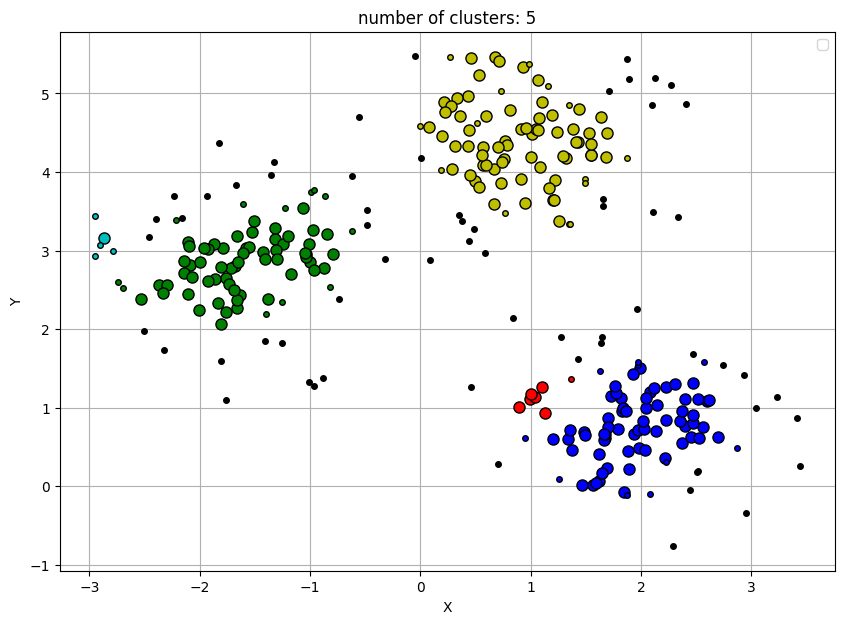

In [6]:
plt.figure(figsize=(10,7))

colors=["y", "b", "g", "r", "c", "m"]
for k,col in zip(unique_labels,colors):
    if k==-1:
        col="k"
        
    class_member_mask = (labels == k)

    xy = x[class_member_mask & core_sample_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=col,
             markeredgecolor="k", markersize=8)

    xy = x[class_member_mask & ~core_sample_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=col,
             markeredgecolor="k", markersize=4)
    

plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.title("number of clusters: %d" % n_clusters)
plt.show()